In [11]:


import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker
import os
import sys
import xarray as xr
import scipy.io as sio
from scipy.interpolate import griddata
import datetime
import cmocean
# import h5py
import bathy_smoother
# import pyresample
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes

#proj_dir = os.path.join(os.pardir,os.pardir)
proj_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_dir = os.path.join(proj_dir,'data')
src_dir = os.path.join(proj_dir,'src')

sys.path.append(src_dir)



In [2]:
# # load bathmetry map

# gebco_2023_bed = os.path.join(data_dir,'raw','GEBCO_2023','GEBCO_2023_sub_ice_topo.nc')
# g23 = xr.open_dataset(gebco_2023_bed)

# g23 = g23.sel(lon=slice(142,170),lat=slice(-30,-10)) 

In [3]:
# #load ocean currents

currents = xr.open_dataset(data_dir+'/raw/'+'IMOS_aggregation_20230714T064513Z.nc')

currents = currents.drop_vars(['GSLA','GSL','UCUR_MEAN','VCUR_MEAN'])

currents.load()

<xarray.Dataset>
Dimensions:    (TIME: 10227, LONGITUDE: 114, LATITUDE: 98)
Coordinates:
  * TIME       (TIME) datetime64[ns] 1993-01-01 1993-01-02 ... 2020-12-31
  * LONGITUDE  (LONGITUDE) float64 142.4 142.6 142.8 143.0 ... 164.6 164.8 165.0
  * LATITUDE   (LATITUDE) float64 -30.0 -29.8 -29.6 -29.4 ... -11.0 -10.8 -10.6
Data variables:
    UCUR       (TIME, LATITUDE, LONGITUDE) float64 ...
    VCUR       (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes: (12/35)
    author:                        Cahill, Madeleine
    author_email:                  madeleine.cahill@csiro.au
    citation:                      The citation in a list of references is: "...
    Conventions:                   CF-1.6,IMOS-1.4
    date_created:                  2022-09-04T03:37:50Z
    geospatial_lat_max:            -10.600000000000001
    ...                            ...
    data_centre_email:             info@aodn.org.au
    disclaimer:                    Data, products and services from IMOS are ...
    distribution_statement:        Data may be re-used, provided that related...
    license:                       http://creativecommons.org/licenses/by/4.0/
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         Gridded Sea Level Anomaly - Australia Regi...

In [4]:
## make rolling means

# summer mean


# winter mean

# annual mean
mean_1yr = currents.rolling(TIME=365,center=True).mean()
print('done')
# # 2-yr mean
mean_2yr = currents.rolling(TIME=365*2,center=True).mean()
print('done')

# # 5-yr mean
mean_5yr = currents.rolling(TIME=365*5,center=True).mean()
print('done')

# # 10-yr mean
mean_10yr = currents.rolling(TIME=365*10,center=True).mean()
print('done')



<Figure size 640x480 with 0 Axes>

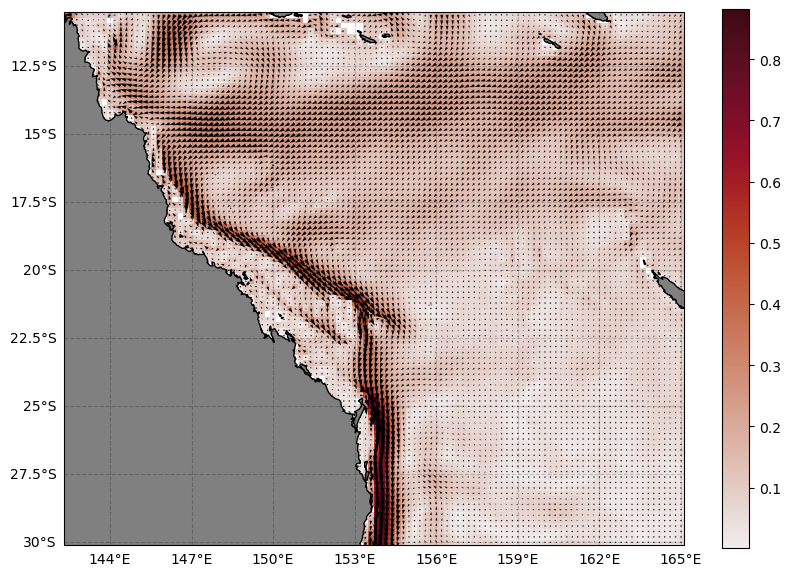

In [5]:
# 1 yr mean


# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=1,ncols=1,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[10,7])
ax = None

#make an axis and decorate the cartopy stuff
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
# ax.set_extent([64, 80, -75, -62])

coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                        facecolor='none', name='coastline')
feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')

# add bathymetry
# im = (-g23.elevation).plot.pcolormesh(x='lon',y='lat',cmap='cmo.deep',add_colorbar=False,vmin=0,vmax=3500)

# add colour by vel magnitude
im = ((mean_1yr.UCUR.mean(dim='TIME')**2+mean_1yr.VCUR.mean(dim='TIME')**2)**0.5).plot.pcolormesh(x='LONGITUDE',y='LATITUDE',cmap='cmo.amp',add_colorbar=True)

# add velocities
qu = ax.quiver(currents.LONGITUDE,currents.LATITUDE,mean_1yr.UCUR.mean(dim='TIME'),mean_1yr.VCUR.mean(dim='TIME'),cmap='cmo.deep')


<Figure size 640x480 with 0 Axes>

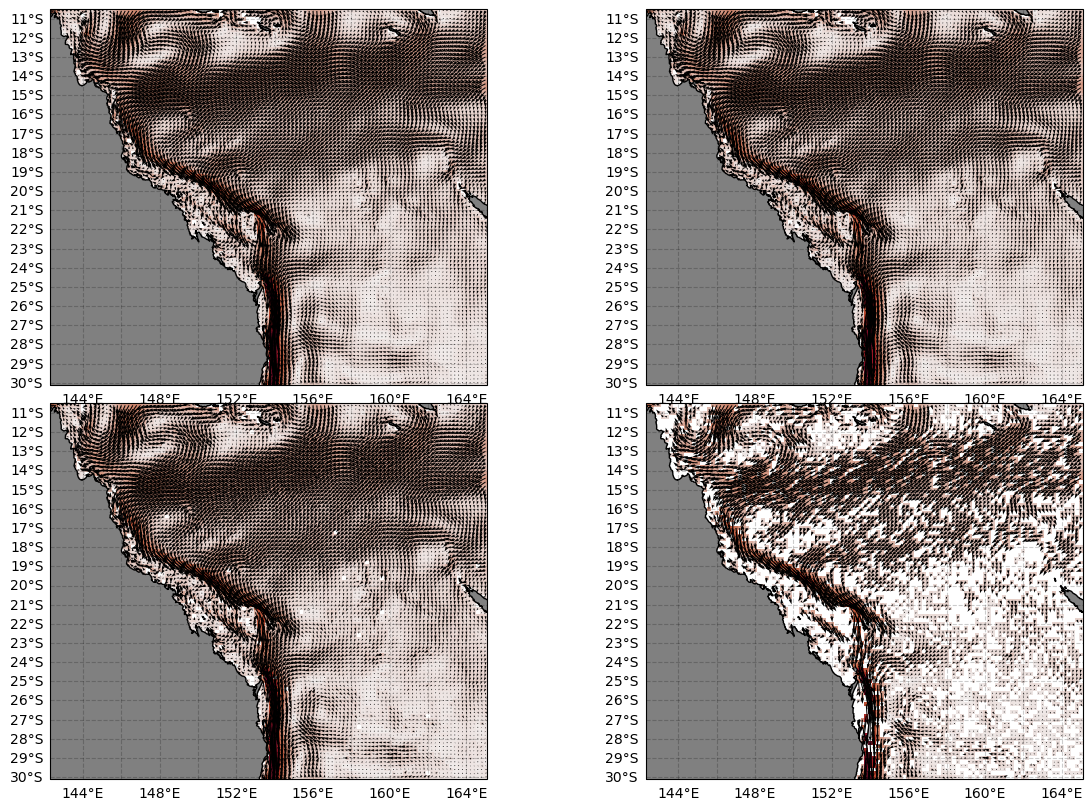

In [14]:
# all yrs


# Create a plot of the bathymetry data using Cartopy
gs = gridspec.GridSpec(nrows=2,ncols=2,wspace=0.05, hspace=0.05)
plt.cla()
plt.clf()
fig = plt.figure(figsize=[15,10])
ax = None
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                        facecolor='none', name='coastline')

##
ax = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
gl.ylocator = mticker.FixedLocator(np.arange(-30,-10,1))
gl.xlocator = mticker.FixedLocator(np.arange(140,167,2))
# ax.set_extent([64, 80, -75, -62])
feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')

# add bathymetry
# im = (-g23.elevation).plot.pcolormesh(x='lon',y='lat',cmap='cmo.deep',add_colorbar=False,vmin=0,vmax=3500)

# add colour by vel magnitude
im = ((mean_1yr.UCUR.mean(dim='TIME')**2+mean_1yr.VCUR.mean(dim='TIME')**2)**0.5).plot.pcolormesh(x='LONGITUDE',y='LATITUDE',cmap='cmo.amp',add_colorbar=False,vmin=0,vmax=0.9)

# add velocities
qu = ax.quiver(currents.LONGITUDE,currents.LATITUDE,mean_1yr.UCUR.mean(dim='TIME'),mean_1yr.VCUR.mean(dim='TIME'),cmap='cmo.deep',scale=10)

##
ax = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
gl.ylocator = mticker.FixedLocator(np.arange(-30,-10,1))
gl.xlocator = mticker.FixedLocator(np.arange(140,167,2))
# ax.set_extent([64, 80, -75, -62])
feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')

# add bathymetry
# im = (-g23.elevation).plot.pcolormesh(x='lon',y='lat',cmap='cmo.deep',add_colorbar=False,vmin=0,vmax=3500)

# add colour by vel magnitude
im = ((mean_2yr.UCUR.mean(dim='TIME')**2+mean_2yr.VCUR.mean(dim='TIME')**2)**0.5).plot.pcolormesh(x='LONGITUDE',y='LATITUDE',cmap='cmo.amp',add_colorbar=False,vmin=0,vmax=0.9)

# add velocities
qu = ax.quiver(currents.LONGITUDE,currents.LATITUDE,mean_2yr.UCUR.mean(dim='TIME'),mean_2yr.VCUR.mean(dim='TIME'),cmap='cmo.deep',scale=10)

##
ax = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
gl.ylocator = mticker.FixedLocator(np.arange(-30,-10,1))
gl.xlocator = mticker.FixedLocator(np.arange(140,167,2))
# ax.set_extent([64, 80, -75, -62])
feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')

# add bathymetry
# im = (-g23.elevation).plot.pcolormesh(x='lon',y='lat',cmap='cmo.deep',add_colorbar=False,vmin=0,vmax=3500)

# add colour by vel magnitude
im = ((mean_5yr.UCUR.mean(dim='TIME')**2+mean_5yr.VCUR.mean(dim='TIME')**2)**0.5).plot.pcolormesh(x='LONGITUDE',y='LATITUDE',cmap='cmo.amp',add_colorbar=False,vmin=0,vmax=0.9)

# add velocities
qu = ax.quiver(currents.LONGITUDE,currents.LATITUDE,mean_5yr.UCUR.mean(dim='TIME'),mean_5yr.VCUR.mean(dim='TIME'),cmap='cmo.deep',scale=10)


##
ax = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True,color='black', alpha=0.2, linestyle='--')
gl.right_labels = False
gl.top_labels = False
gl.ylocator = mticker.FixedLocator(np.arange(-30,-10,1))
gl.xlocator = mticker.FixedLocator(np.arange(140,167,2))
# ax.set_extent([64, 80, -75, -62])import matplotlib.ticker as mticker
feature = ax.add_feature(coast, edgecolor='black',facecolor='gray')

# add bathymetry
# im = (-g23.elevation).plot.pcolormesh(x='lon',y='lat',cmap='cmo.deep',add_colorbar=False,vmin=0,vmax=3500)

# add colour by vel magnitude
im = ((mean_10yr.UCUR.mean(dim='TIME')**2+mean_10yr.VCUR.mean(dim='TIME')**2)**0.5).plot.pcolormesh(x='LONGITUDE',y='LATITUDE',cmap='cmo.amp',add_colorbar=False,vmin=0,vmax=0.9)

# add velocities
qu = ax.quiver(currents.LONGITUDE,currents.LATITUDE,mean_10yr.UCUR.mean(dim='TIME'),mean_10yr.VCUR.mean(dim='TIME'),cmap='cmo.deep',scale=10)
